In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
# from sklearn.cross_validation import train_test_split
# from sklearn import cross_validation
# from sklearn import tree
# from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn import ensemble
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Customer Attrition.csv")

In [3]:
df.head()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0


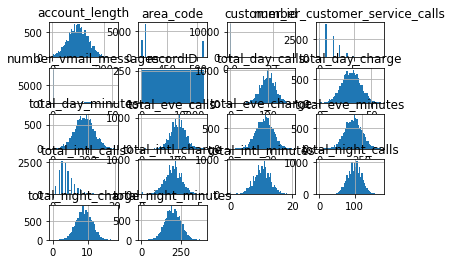

In [4]:
df.hist(bins=50,sharex=False,sharey=False)
plt.show()

In [5]:
df.isna().sum()

recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

In [6]:
import random
# ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
# for row, col in random.sample(ix, int((.1*len(ix)))):
#     df.iat[row, col] = np.nan
# replaced = collections.defaultdict(set)
# ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
# random.shuffle(ix)
# to_replace = int(round(.1*len(ix)))
# for row, col in ix:
#     if len(replaced[row]) < df.shape[1] - 1:
#         df.iloc[row, col] = np.nan
#         to_replace -= 1
#         replaced[row].add(col)
#         if to_replace == 0:
#             break
df = df.mask(np.random.random(df.shape) < .1)
df.isna().sum()

recordID                         1310
state                            1355
account_length                   1261
area_code                        1284
international_plan               1287
voice_mail_plan                  1319
number_vmail_messages            1338
total_day_minutes                1341
total_day_calls                  1249
total_day_charge                 1292
total_eve_minutes                1302
total_eve_calls                  1240
total_eve_charge                 1285
total_night_minutes              1350
total_night_calls                1307
total_night_charge               1292
total_intl_minutes               1234
total_intl_calls                 1352
total_intl_charge                1294
number_customer_service_calls    1302
churn                            1297
customer_id                      1335
dtype: int64

In [7]:
df.head(5)

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1.0,HI,101.0,NaN,no,no,0.0,70.9,123.0,12.05,...,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3.0,no,23383607.0
1,2.0,MT,137.0,510.0,no,no,0.0,NaN,86.0,38.01,...,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0.0,no,NaN
2,3.0,NaN,103.0,408.0,no,yes,29.0,294.7,95.0,50.10,...,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1.0,no,59063354.0
3,4.0,NM,NaN,415.0,no,no,0.0,216.8,123.0,NaN,...,10.74,220.6,82.0,9.93,15.7,2.0,4.24,NaN,no,25464504.0
4,5.0,SC,108.0,415.0,no,no,0.0,197.4,78.0,33.56,...,10.54,NaN,107.0,9.20,7.7,4.0,2.08,NaN,no,691824.0


In [8]:
# df.hist()
# plt.show()

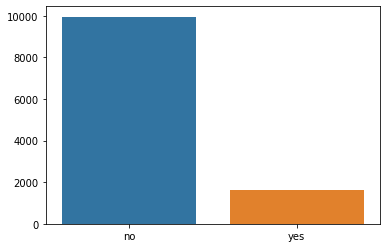

In [9]:
y=df['churn'].value_counts()
sns.barplot(y.index,y.values)

In [10]:
y_yes=df["churn"][df["churn"]== "yes"]
print("Churn Percentage = "+str((y_yes.shape[0]/df["churn"].shape[0]*100)))

Churn Percentage = 12.705553831833697


In [11]:
df.describe()

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
count,11582.000000,11631.000000,11608.000000,11554.000000,11551.000000,11643.000000,11600.000000,11590.000000,11652.000000,11607.000000,11542.000000,11585.000000,11600.000000,11658.000000,11540.000000,11598.000000,11590.000000,1.155700e+04
mean,6439.963910,100.812742,437.321072,7.964341,180.122544,100.198317,30.664137,200.993477,100.163749,17.066248,200.693580,99.968407,9.012003,10.237382,4.457539,2.770173,1.571096,3.156229e+11
std,3720.611827,39.926142,42.454718,13.613290,54.186511,19.910099,9.203844,50.634668,19.914377,4.320799,50.638457,19.731433,2.281424,2.784087,2.467506,0.752719,1.312469,3.385936e+13
min,1.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
25%,3219.250000,74.000000,408.000000,0.000000,144.000000,87.000000,24.500000,166.900000,87.000000,14.140000,167.000000,87.000000,7.500000,8.500000,3.000000,2.300000,1.000000,2.412959e+07
50%,6443.500000,100.000000,415.000000,0.000000,180.000000,101.000000,30.600000,201.400000,101.000000,17.100000,200.900000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,3.221520e+07
75%,9665.750000,127.000000,510.000000,19.000000,216.200000,114.000000,36.840000,235.100000,114.000000,19.970000,235.175000,113.000000,10.570000,12.075000,6.000000,3.270000,2.000000,5.535268e+07
max,12892.000000,243.000000,510.000000,52.000000,351.500000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,3.640000e+15


In [12]:
df.interpolate(method="linear",limit_direction="both",inplace=True)

In [13]:
df.isna().sum()

recordID                            0
state                            1355
account_length                      0
area_code                           0
international_plan               1287
voice_mail_plan                  1319
number_vmail_messages               0
total_day_minutes                   0
total_day_calls                     0
total_day_charge                    0
total_eve_minutes                   0
total_eve_calls                     0
total_eve_charge                    0
total_night_minutes                 0
total_night_calls                   0
total_night_charge                  0
total_intl_minutes                  0
total_intl_calls                    0
total_intl_charge                   0
number_customer_service_calls       0
churn                            1297
customer_id                         0
dtype: int64

In [14]:
df.fillna(method="bfill",inplace=True)
df.fillna(method="ffill",inplace=True)

In [15]:
df.isna().sum()

recordID                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

In [16]:
y_yes=df["churn"][df["churn"]== "yes"]
print("Churn Percentage = "+str((y_yes.shape[0]/df["churn"].shape[0]*100)))
# 14.20 percent tend to leave 

Churn Percentage = 14.14055228048402


In [17]:
df.describe()

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
count,12892.00000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,1.289200e+04
mean,6446.50000,100.788551,437.322797,7.930616,180.211247,100.157927,30.661140,200.957276,100.134231,17.065764,200.632780,100.062791,9.010505,10.233579,4.448728,2.769683,1.572564,2.830296e+11
std,3721.74417,38.938307,41.405896,13.226081,52.881979,19.414232,8.992327,49.443500,19.435263,4.212755,49.281166,19.245723,2.223297,2.717386,2.401908,0.733801,1.280071,3.205835e+13
min,1.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
25%,3223.75000,74.000000,411.500000,0.000000,145.000000,88.000000,24.653750,167.600000,87.250000,14.230000,168.200000,87.000000,7.530000,8.500000,3.000000,2.300000,1.000000,2.423911e+07
50%,6446.50000,100.000000,415.000000,0.000000,180.400000,100.000000,30.580000,201.300000,100.000000,17.110000,200.800000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000,3.240734e+07
75%,9669.25000,127.000000,462.500000,16.500000,215.500000,113.000000,36.650000,233.900000,113.000000,19.832500,233.300000,113.000000,10.490000,12.000000,6.000000,3.240000,2.000000,5.503037e+07
max,12892.00000,243.000000,510.000000,52.000000,351.500000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,3.640000e+15


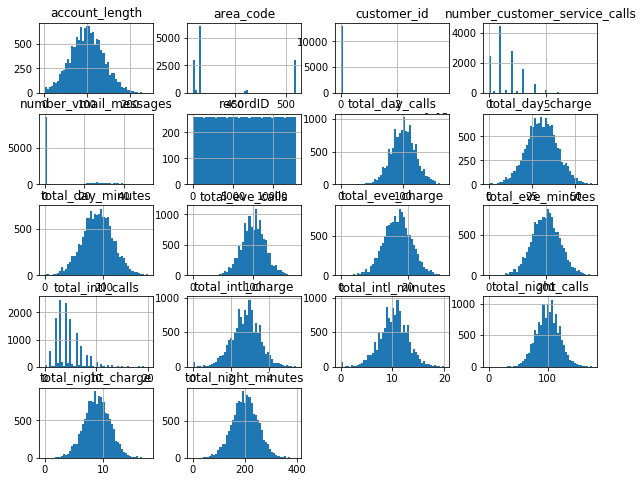

In [18]:
# df.hist()
# plt.show()
df.hist(bins=50,sharey=False, sharex=False, figsize=(10,8))
plt.show()

In [19]:
# df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 


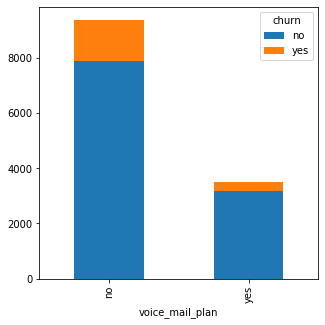

In [20]:
df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<function matplotlib.pyplot.show(*args, **kw)>

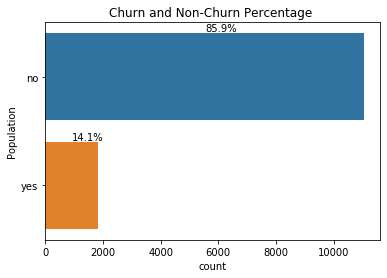

In [21]:
# sns.pairplot(df)
# y=df['churn'].value_counts()
# sns.barplot(y.index,y.values)
ax = sns.countplot(y="churn", data=df)
plt.title('Churn and Non-Churn Percentage ')
plt.ylabel('Population')
total=len(df['churn'])
for i in ax.patches:
    percentage='{:.1f}%'.format(100 * i.get_width()/total)
#     x=i.get_x()+i.get_width()+0.02
#     y=i.get_y()+i.get_height()/2
    x = i.get_x() + i.get_width() / 2
    y = i.get_y() - 0.02
    ax.annotate(percentage,(x,y))
plt.show

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
recordID                         12892 non-null float64
state                            12892 non-null object
account_length                   12892 non-null float64
area_code                        12892 non-null float64
international_plan               12892 non-null object
voice_mail_plan                  12892 non-null object
number_vmail_messages            12892 non-null float64
total_day_minutes                12892 non-null float64
total_day_calls                  12892 non-null float64
total_day_charge                 12892 non-null float64
total_eve_minutes                12892 non-null float64
total_eve_calls                  12892 non-null float64
total_eve_charge                 12892 non-null float64
total_night_minutes              12892 non-null float64
total_night_calls                12892 non-null float64
total_night_charge               12892 non-null float6

In [23]:
df.select_dtypes(include='object').head(1)

,state,international_plan,voice_mail_plan,churn
0,HI,no,no,no


# LOGISTIC REGRESSION

In [24]:
label_encoder=preprocessing.LabelEncoder()

In [25]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international_plan'] = label_encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])

In [26]:
df.dtypes

recordID                         float64
state                              int32
account_length                   float64
area_code                        float64
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                  float64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                float64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
churn                             object
customer_id                      float64
dtype: object

In [27]:
df.drop(["recordID","customer_id"],inplace=True,axis=1)

In [28]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,11,101.0,510.0,0,0,0.0,70.9,123.0,12.05,244.8,73.0,18.01,236.0,73.0,10.62,10.6,3.0,2.86,3.0,no
1,26,137.0,510.0,0,0,0.0,182.8,86.0,38.01,244.8,139.0,20.81,94.2,81.0,4.24,9.5,7.0,2.57,0.0,no
2,32,103.0,408.0,0,1,29.0,294.7,95.0,50.10,237.3,105.0,20.17,300.3,127.0,13.51,13.7,6.0,3.70,1.0,no
3,32,105.5,415.0,0,0,0.0,216.8,123.0,41.83,126.4,88.0,10.74,220.6,82.0,9.93,15.7,2.0,4.24,1.0,no
4,40,108.0,415.0,0,0,0.0,197.4,78.0,33.56,124.0,101.0,10.54,221.8,107.0,9.20,7.7,4.0,2.08,1.0,no


In [29]:
# X = df.as_matrix().astype(np.float)
# scaler=preprocessing.StandardScaler()
# X=scaler.fit_transform(X)
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X=df.iloc[:,:19]
y=df.iloc[:,19]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=10,max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred=model.predict(x_test)

In [35]:
model.coef_

array([[ 3.99453354e-03,  5.33854912e-04, -2.46131745e-03,
         1.58599128e+00, -6.90307698e-01, -2.42208722e-03,
         3.95491121e-04,  1.70066434e-03,  4.18158813e-04,
         2.93127139e-04,  9.86076607e-05,  3.12245001e-04,
         2.40184704e-05,  5.14125363e-04,  4.66731832e-04,
         6.24104507e-04, -7.67494777e-03,  1.00144210e-03,
         4.91488540e-02]])

In [36]:
model.intercept_

array([-5.77817501])

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
con_mat=confusion_matrix(y_test,pred)
print(con_mat)

[[3277   49]
 [ 493   49]]


In [39]:
labels=[1,0]
con_mat=confusion_matrix(y_test,pred,labels=labels)
print(con_mat)

[[  49  493]
 [  49 3277]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

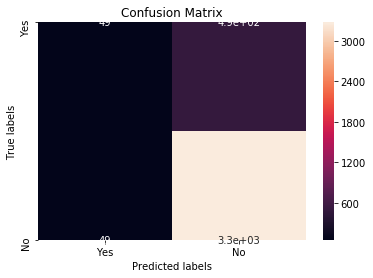

In [40]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
ax= plt.subplot()
sns.heatmap(con_mat, annot=True, ax = ax)#annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])


In [41]:
accuracy=(con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)

0.859875904860393


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score,auc

Text(0.5, 1.0, 'ROC Curve')

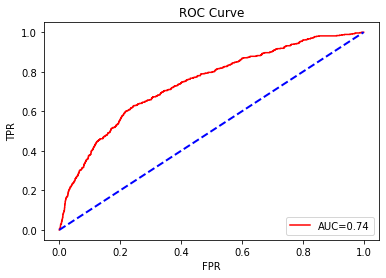

In [43]:
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [44]:
print("ROC_AUC Score: ",roc_auc_score(y_test,preds))

ROC_AUC Score:  0.7415587354911433


In [45]:
df["churn"].value_counts()

0    11069
1     1823
Name: churn, dtype: int64

# KNN 

In [46]:
X=df.iloc[:,:19]
Y=df.iloc[:,19]
test_size=0.2
seed=10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

In [47]:
len(X_train), len(y_train)

(10313, 10313)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [50]:
knn.score(X_test, y_test) #Accuracy on test data

0.8681659557968204

In [51]:
knn.score(X_train,y_train) #Accuracy on train data

0.8837389702317463

In [52]:
pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred, labels = [1,0]))

[[  69  307]
 [  33 2170]]


In [53]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,95)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 17}

In [54]:
score = {}
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score[i] = knn.score(X_test, y_test)

#score

error = {}

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error[i]=np.mean(pred_i != y_test)

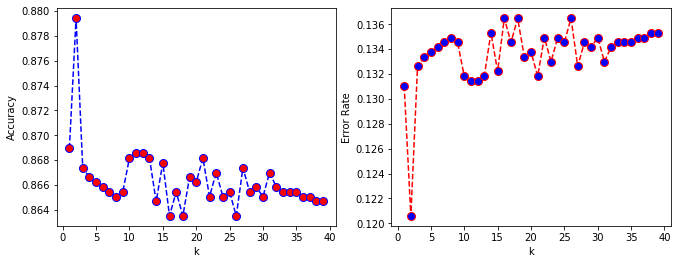

In [55]:
 x = list(score.keys())
y=list(score.values())
plt.figure(figsize = (11, 4))
plt.subplot(1,2,1,)
plt.plot(x, y, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=8)
plt.xlabel('k')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(list(error.keys()), list(error.values()), color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=8)
plt.xlabel('k')
plt.ylabel('Error Rate')

plt.show()

# SVC

In [56]:
# # df['churn']
# x=df.iloc[:,:19]
# y=df.iloc[:,19]

In [57]:
# X = x[y < 2]
# Y = y[y < 2]

In [58]:
# X0 = X[Y == 0]
# X1 = X[Y == 1]
# plt.figure(figsize=(7,4)) #change figure-size for easier viewing
# plt.scatter(X0[:,0],X0[:,1], color = 'red')
# plt.scatter(X1[:,0],X1[:,1], color = 'blue')

In [59]:
# from sklearn.model_selection import train_test_split
# seed = 10
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [60]:
# from sklearn.svm import SVC
# svm_inst = SVC(kernel='linear')

In [61]:
# svm_inst.fit(X_train,y_train)

In [62]:
# y_pred = svm_inst.predict(X_test)

In [63]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

In [64]:

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [66]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=sc.transform(X_test)

In [67]:
X_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.750617,-1.215181,-1.407372,-0.330665,-0.614608,1.616181,-1.253268,-0.191731,-1.286568,0.305208,-0.447024,0.293353,-0.925006,0.977905,-0.910563,-0.790615,0.297839,-0.840296,0.468274
1,1.222309,-0.031477,-1.407372,-0.330665,-0.614608,-0.607822,-0.112199,1.213664,-0.098137,-0.456457,-0.447024,-0.466481,1.520943,-0.586414,1.520479,-1.743464,1.664403,-1.707036,1.637831
2,-0.125382,-0.275446,-0.726256,-0.330665,-0.614608,-0.607822,-0.619828,1.213664,-0.627069,0.690665,-0.669228,1.929406,0.756864,1.039858,1.669417,-1.643164,-1.133799,-1.623572,1.247978
3,0.750617,-1.612761,-0.045140,-0.330665,-0.614608,-0.607822,0.316434,-0.397013,1.050325,-0.350071,-0.288306,-0.361734,0.580768,-0.679344,0.595626,0.232444,0.297839,0.244733,1.247978
4,0.818002,0.257672,1.453315,-0.330665,-0.614608,-0.607822,0.727511,-1.249724,0.742559,-1.851814,1.933737,-1.814895,-1.136918,-1.624131,-1.124360,0.743973,0.037541,0.739096,0.468274


In [68]:
svm_classifier= SVC(probability=True)
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [69]:
# Predict
y_pred_svm= svm_classifier.predict(X_test)
#Classification Report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2789
           1       0.83      0.43      0.57       434

    accuracy                           0.91      3223
   macro avg       0.87      0.71      0.76      3223
weighted avg       0.91      0.91      0.90      3223



Text(33.0, 0.5, 'predicted label')

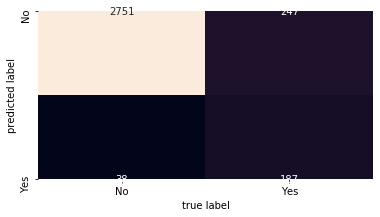

In [70]:
mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat_svm.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')


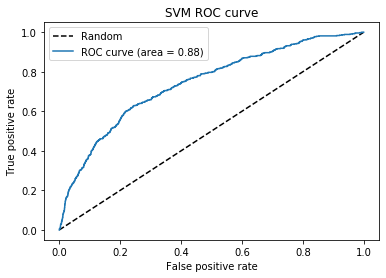

In [71]:
y_pred_svm_proba=svm_classifier.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, _svm = roc_curve(y_test, y_pred_svm_proba)
roc_auc=auc(fpr_svm,tpr_svm)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc='best')